In [1]:
import datetime

import numpy as np
import pandas as pd
from numba import jit

import plotly
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
from plotly.graph_objs.scatter import Line
from plotly.graph_objs import Scatter

In [2]:
from scipy.io import loadmat
mat = loadmat('ex3data1.mat')
X = mat['X']
y = mat['y']
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

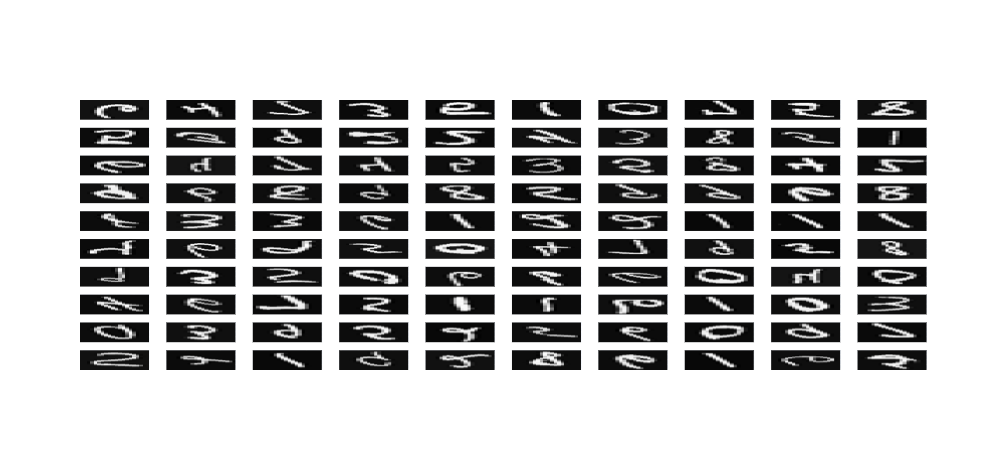

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(mat['X'], mat['y'], test_size=(4900/5000))

fig = make_subplots(rows=10, cols=10)

for i in range(0, 100):
    r = i//10 + 1
    c = i%10 + 1
    fig.add_trace(
        go.Heatmap(z=X_train[i].reshape(20, 20, order='F'), 
                   colorscale=[[0, 'rgb(0,0,0)'], [1, 'rgb(255,255,255)']], showscale=False),
        row=r, col=c)
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.show()



In [44]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def z(th, x):
    return x @ th

def h(th, x):
    return sigmoid(z(th, x))

def J(th, x, y, lamb):
    h_th = h(th, x)
    m = x.shape[0]
    j = 1/m * ( -y * np.log(h_th) - (1-y) * np.log(1 - h_th) ).sum()
    c = lamb / (2 * m) * (th[1:] ** 2).sum()
    return j + c

def grad(th, x, y, lamb):
    m = x.shape[0]
    g = 1/m * (x.T @ (h(th, x) - y))
    c = lamb/m * th
    c[0] = 0
    return g + c
    
def lr_cost_function(th, x, y, lamb):
#     j = 0
    j = J(th, x, y, lamb)
    g = grad(th, x, y, lamb)
    return j, g

In [46]:
theta_t = np.array([-2, -1, 1, 2])
X_t = np.c_[np.ones(5), np.arange(1, 16).reshape(5, 3, order='F') / 10] 
y_t = (np.array([1, 0, 1, 0, 1]) >= 0.5).astype(int)
lambda_t = 3

lr_cost_function(theta_t, X_t, y_t, lambda_t)

(2.534819396109744,
 array([ 0.14656137, -0.54855841,  0.72472227,  1.39800296]))

In [93]:
def grad_descent(th_orig, x, y, lamb, alpha, iter_num):
    th = th_orig.copy()
    j_history = np.zeros(iter_num)
    for i in range(iter_num):
        j, g = lr_cost_function(th, x, y, lamb)
        j_history[i] = j
        th -= alpha * g
    return j_history, th


# initial_theta = np.zeros(X.shape[1])
# grad_descent(theta_t.astype(float), X_t, y_t, 1, 0.01, 100)
# grad_descent(initial_theta, X, y.ravel(), 1, 0.01, 10)
# X_t.shape, y_t.shape, theta_t.shape, X.shape, y.shape, initial_theta.shape

(array([ -17.05142064,  210.45041215,  426.12973854,  634.61981033,
         839.36929025, 1042.19454433, 1244.00113721, 1445.24884619,
        1646.17939254, 1846.92451627]),
 array([ 0.00000000e+00,  0.00000000e+00,  2.39150707e-09, -2.52717118e-07,
        -1.76263350e-06,  6.60082056e-05,  8.42369376e-05,  3.47375984e-05,
         1.07367520e-05,  1.21637109e-05,  3.57852602e-06, -2.67759250e-06,
        -6.63762310e-06, -1.49711972e-05, -1.63093535e-05, -9.25830118e-06,
        -2.89300408e-06, -1.98988399e-08,  3.07183317e-08,  0.00000000e+00,
         2.51089279e-08, -2.51702689e-07, -7.83028820e-08, -4.81459616e-06,
        -8.07438331e-06,  1.07266574e-04,  3.82677053e-04,  5.33598869e-04,
         4.12928787e-04,  1.14106691e-04, -1.01927750e-04, -1.58978658e-04,
        -1.72924175e-04, -1.28974218e-04, -9.60086439e-05, -6.16955625e-05,
        -2.67203717e-05, -1.47448258e-05, -4.23153013e-06, -1.57728348e-06,
        -2.15373525e-07,  2.43271826e-06, -5.26079572e-06,  2.12

In [37]:
# from scipy.optimize import minimize

# def one_vs_all(x, y, lamb):
#     X = np.c_[np.ones(x.shape[0]), x]
#     Y = (y == 1).astype(int)
#     initial_theta = np.zeros((X.shape[1], 1))
#     f = lambda th, xx, yy, ll: lr_cost_function(th, xx, yy, ll)[1]
#     minimize(f, initial_theta, args=(X, Y, lamb), method='CG', options={'disp': True, 'return_all': True, 'maxiter': 10})


In [182]:
def one_vs_all(x, y, lamb, alpha, iter_num):
    xx = np.c_[np.ones(x.shape[0]), x]
    thetas = np.zeros(xx.shape[1])

    for i in range(1, 11):
        yy = (y == i).astype(int)
        initial_theta = np.zeros(xx.shape[1])
        j_history, th = grad_descent(initial_theta, xx, yy, lamb, alpha, iter_num)
        thetas = np.c_[thetas, th]
        
    return thetas.T
    
lamb = 1
alpha = 0.1
iter_num = 4000

all_thetas = one_vs_all(X, y.ravel(), lamb, alpha, iter_num)


In [183]:
xx = np.c_[np.ones(X.shape[0]), X]
print(all_thetas.T.shape, xx.shape)
h_th = xx @ all_thetas.T
print(h_th.shape)


mm = h_th.max(1)
p = np.zeros(xx.shape[0])
for i in range(X.shape[0]):
    for j in range(1, 11):
        if mm[i] == h_th[i, j]:
            p[i] = j
            
print(p.shape, y.shape, (p == y.ravel()).shape)

(p == y.ravel()).mean()
        
        

(401, 11) (5000, 401)
(5000, 11)
(5000,) (5000, 1) (5000,)


0.8474

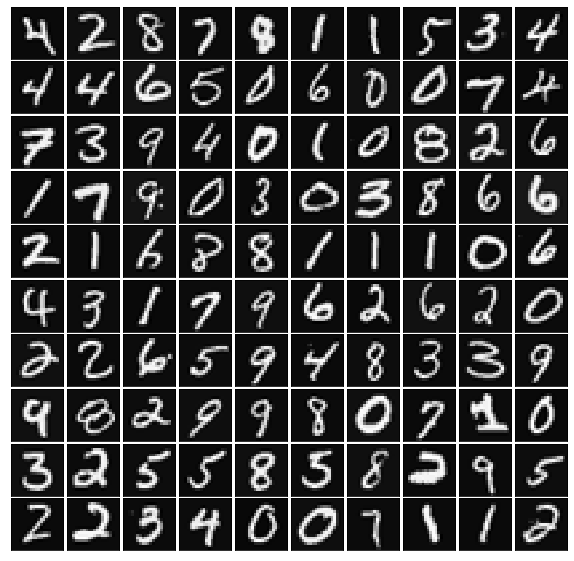

Testing lrCostFunction() with regularization
Cost: 2.534819396109744
Expected cost: 2.534819
Gradients:
[ 0.14656137 -0.54855841  0.72472227  1.39800296]
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003

One vs all : 1 / 10
i = 0 , norm = 1.894583716453166 J = 0.6931471805599454
i = 100 , norm = 0.00991334681817917 J = 0.04169403685901043
i = 200 , norm = 0.005934407333764285 J = 0.036061356838176996
i = 300 , norm = 0.004512127829861028 J = 0.033547606444429966
i = 400 , norm = 0.0037791231279956307 J = 0.03198818816179409
i = 500 , norm = 0.003329660844439229 J = 0.030867761598347976
i = 600 , norm = 0.003024499212667556 J = 0.02999353353895198
i = 700 , norm = 0.002802765819385568 J = 0.029274750326943925
i = 800 , norm = 0.0026335108523407634 J = 0.028662249640304224
i = 900 , norm = 0.002499310883617736 J = 0.02812673855631415
i = 1000 , norm = 0.0023896150665441516 J = 0.027649511171841286
i = 1100 , norm = 0.002297673950202026 J = 0.027217972626435938
i = 1200 , norm

In [185]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat

# データの読み込み
def load_data1():
    data = loadmat("ex3data1")
    # yが元データだと5000x1の行列なので、ベクトルに変換する
    return np.array(data['X']), np.ravel(np.array(data['y']))

X_data, y = load_data1()
m = len(X_data[:, 1])

# ランダムに100個を画像で表示
np.random.seed(114514)# ここをコメントアウトすると再現性はなくなる
sel = np.arange(m)
np.random.shuffle(sel)
sel = sel[:100]
fig = plt.figure(figsize = (10, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_data[sel[i]].reshape((20, 20)).T, cmap='gray')
plt.show()

# シグモイド関数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# ロジスティック回帰のコスト関数
def lr_cost_function(theta, X, y, lambda_):
    m = len(y)
    h_theta = sigmoid(np.dot(X, theta))
    J = np.sum(-y * np.log(h_theta) - (1 - y) * np.log(1 - h_theta)) / m + lambda_ / 2 / m * np.sum(theta[1:] ** 2)
    # θ0を正則化しないようにする
    grad = np.dot(X.T, h_theta - y) / m
    temp = theta[:]
    temp[0] = 0
    grad += lambda_ / m * temp
    return J, grad

# コスト関数のテスト
print("Testing lrCostFunction() with regularization")
theta_t = np.array([-2, -1, 1, 2])
# orderの設定をしないとreshapeのデフォルト設定はOctaveと逆なので注意
X_t = np.c_[np.ones(5), np.arange(1, 16).reshape(5, 3, order='F') / 10] 
y_t = (np.array([1, 0, 1, 0, 1]) >= 0.5).astype(int)
lambda_t = 3
J, grad = lr_cost_function(theta_t, X_t, y_t, lambda_t)
print("Cost:", J)
print("Expected cost: 2.534819")
print("Gradients:")
print(grad)
print("Expected gradients:")
print(" 0.146561\n -0.548558\n 0.724722\n 1.398003\n")

# 遅いのでロジスティック回帰のコスト関数をコストと勾配に分割
def lr_cost_function_cost(theta, X, y, lambda_):
    m = len(y)
    h_theta = sigmoid(np.dot(X, theta))
    J = np.sum(-y * np.log(h_theta) - (1 - y) * np.log(1 - h_theta)) / m + lambda_ / 2 / m * np.sum(theta[1:] ** 2)
    return J

def lr_cost_function_grad(theta, X, y, lambda_):
    m = len(y)
    h_theta = sigmoid(np.dot(X, theta))
    grad = np.dot(X.T, h_theta - y) / m
    temp = theta[:]
    temp[0] = 0
    grad += lambda_ / m * temp
    return grad

# 最急降下法（組み込みが遅いので自分で実装）
def gradient_descent(initial_theta, X, y, lambda_, eta, maxiter = 10000, tol=1e-3):
    theta_before = initial_theta
    for i in range(maxiter):
        J, grad = lr_cost_function(theta_before, X, y, lambda_)
        theta = theta_before - eta * grad
        norm = np.linalg.norm(theta - theta_before)
        if(i%100==0) : print("i =",i,", norm =", norm, "J =",J)
        if np.linalg.norm(theta - theta_before) < tol:
            print("収束完了", i)
            break
        theta_before = theta
    return theta

# One-vs-allの訓練
def one_vs_all(X, y, num_labels, lambda_):
    m = X.shape[0]
    n = X.shape[1]
    all_theta = np.zeros((num_labels, n + 1))
    X = np.c_[np.ones(m), X]
    for i in range(num_labels):
        print("One vs all :", i+1, "/", num_labels)
        initial_theta = np.zeros(n+1)
        y_param = y == i+1
        #theta = fmin_ncg(lr_cost_function_cost, initial_theta, fprime=lr_cost_function_grad, args=(X, y_param, lambda_, ), epsilon=1e-12,maxiter=1000, avextol=1e-8, disp=True)
        theta = gradient_descent(initial_theta, X, y_param.astype(int), lambda_, 1)
        all_theta[i, :] = theta
    return all_theta

num_labels = 10
lambda_ = 0.1

all_theta = one_vs_all(X_data, y, num_labels, lambda_)

print()

# 予測
def predict_one_vs_all(all_theta, X):
    m = X.shape[0]
    num_labels = all_theta.shape[0]
    XX = np.c_[np.ones(m), X]
    pred_array = sigmoid(np.dot(XX, all_theta.T))
    print(pred_array)
    p = np.argmax(pred_array, axis=1)+1 #行単位で集計
    return p

pred = predict_one_vs_all(all_theta, X_data)
print(np.bincount(pred))
print("Training Set Accuracy: ", np.mean(pred == y) * 100)
